In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.options.display.max_columns = None

from google.colab import files
uploaded = files.upload()

Saving salaries.csv to salaries.csv


In [ ]:
# 가설 설정
# 1. 업무 숙련도/계약 유형/직무에 따라 연봉이 유의미하게 달라지는가?

# 2. 회사의 위치(국가)/규모에 따라 연봉이 유의미하게 달라지는가?

# 3. 원격(자택) 근무의 비중에 따라 연봉이 유의미하게 달라지는가?

In [ ]:
df = pd.read_csv('salaries.csv',index_col=0)
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [ ]:
# 데이터 정제 - 1. 불필요한 열 제거  2.임시 타겟값 이상치 제거

In [ ]:
# 불필요한 열 salary,salary_currency,employee_residence,work_year 제거 

df = df.drop(['salary_currency','salary','work_year','employee_residence'],axis=1)
df.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,MI,FT,Data Scientist,79833,0,DE,L
1,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,SE,FT,Big Data Engineer,109024,50,GB,M
3,MI,FT,Product Data Analyst,20000,0,HN,S
4,SE,FT,Machine Learning Engineer,150000,50,US,L


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  607 non-null    object
 1   employment_type   607 non-null    object
 2   job_title         607 non-null    object
 3   salary_in_usd     607 non-null    int64 
 4   remote_ratio      607 non-null    int64 
 5   company_location  607 non-null    object
 6   company_size      607 non-null    object
dtypes: int64(2), object(5)
memory usage: 37.9+ KB


In [ ]:
df.describe()

,salary_in_usd,remote_ratio
count,607.000000,607.00000
mean,112297.869852,70.92257
std,70957.259411,40.70913
min,2859.000000,0.00000
25%,62726.000000,50.00000
50%,101570.000000,100.00000
75%,150000.000000,100.00000
max,600000.000000,100.00000


In [ ]:
[(x, df[x].isnull().sum()) for x in df.columns if df[x].isnull().any()]

[]

In [ ]:
df.rename(columns={'salary_in_usd':'salary'},inplace=True)

In [ ]:
df['salary'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary, dtype: float64

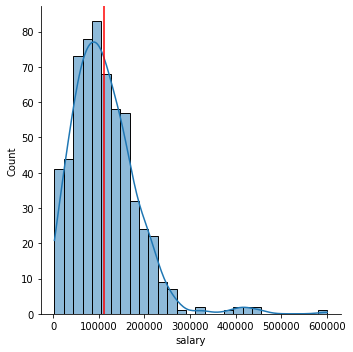

In [ ]:
sns.displot(df['salary'],kde=True);
plt.axvline(112297.869852, color='red');

In [ ]:
# salary 칼럼 이상치 데이터 제거

In [ ]:
df['salary'] = df[df['salary'] < np.percentile(df['salary'], 99.5)]['salary']
df['salary'].describe()

count       603.000000
mean     109853.742952
std       64249.983906
min        2859.000000
25%       62688.500000
50%      100000.000000
75%      150000.000000
max      416000.000000
Name: salary, dtype: float64

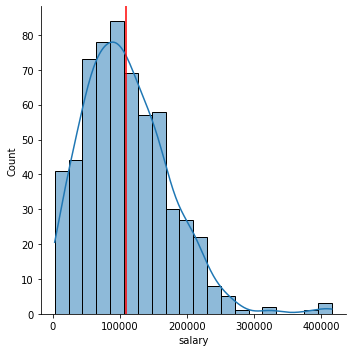

In [ ]:
sns.displot(df['salary'],kde=True);
plt.axvline(109853.742952, color='red');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experience_level  607 non-null    object 
 1   employment_type   607 non-null    object 
 2   job_title         607 non-null    object 
 3   salary            603 non-null    float64
 4   remote_ratio      607 non-null    int64  
 5   company_location  607 non-null    object 
 6   company_size      607 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 37.9+ KB


In [ ]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 606
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experience_level  603 non-null    object 
 1   employment_type   603 non-null    object 
 2   job_title         603 non-null    object 
 3   salary            603 non-null    float64
 4   remote_ratio      603 non-null    int64  
 5   company_location  603 non-null    object 
 6   company_size      603 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 37.7+ KB


In [ ]:
# 타겟 칼럼 recommend 생성 / 연봉 180000$ 이상의 직장

In [ ]:
df['recommend'] = df['salary'] >= 180000
df['recommend'].nunique()

2

In [ ]:
df['recommend'].value_counts()

False    520
True      83
Name: recommend, dtype: int64

In [ ]:
# 최빈값
a = 520/603
a 

0.8623548922056384

In [ ]:
# 데이터 랭글링 완료

In [ ]:
# 임시저장

In [ ]:
df.to_csv('salaries1.csv',encoding='utf-8-sig')

In [ ]:
# 간단한 시각화로 몇가지 가설 검증

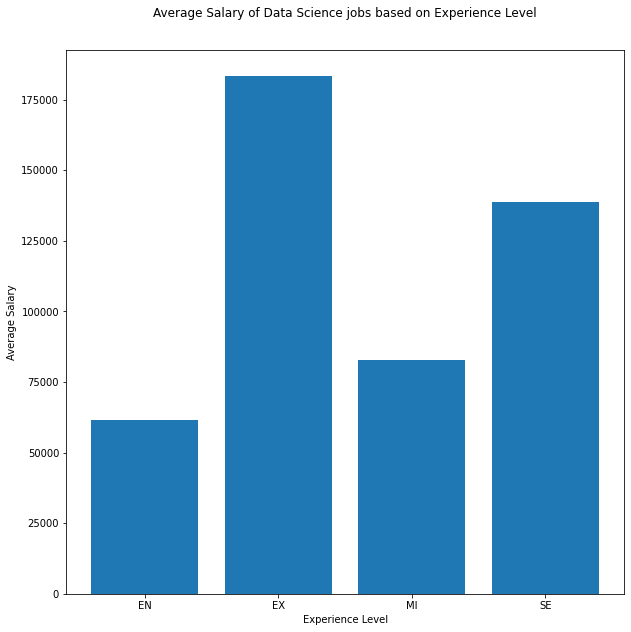

In [ ]:
# 1. 업무 순련도에 따라 연봉이 달라지는가?

salary_experience = df.groupby('experience_level')['salary'].mean()

plt.figure(figsize=(10,10))
plt.bar(salary_experience.index, salary_experience.values)


plt.ylabel('Average Salary')
plt.xlabel('Experience Level')
plt.title('Average Salary of Data Science jobs based on Experience Level', y=1.05);

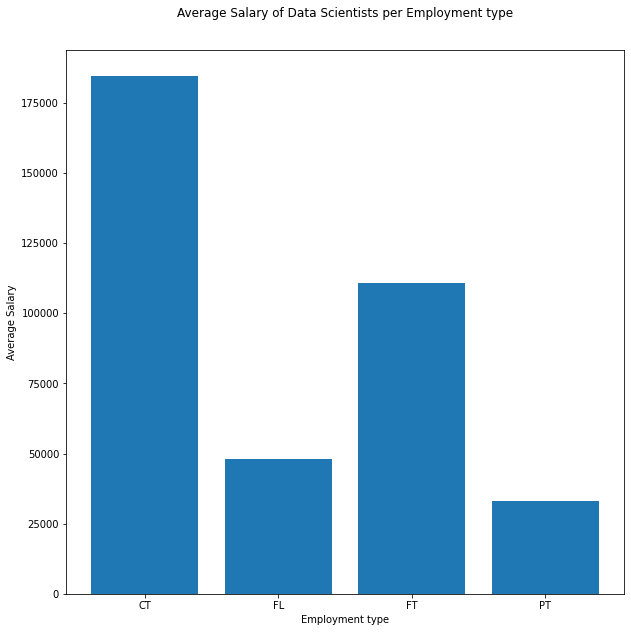

In [ ]:
# 2. 계약 유형에 따라 연봉이 달라지는가?

salary_employment=df.groupby('employment_type').mean()['salary']

plt.figure(figsize=(10,10))
plt.bar(salary_employment.index, salary_employment.values)

plt.ylabel('Average Salary')
plt.xlabel('Employment type')
plt.title('Average Salary of Data Scientists per Employment type', y=1.05);

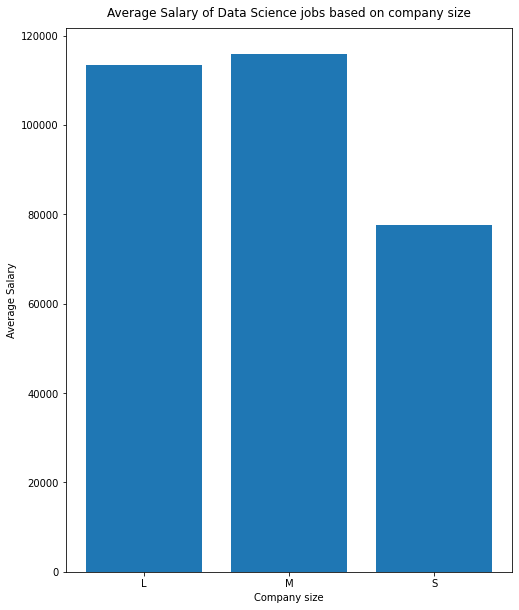

In [ ]:
# 3. 회사의 규모에 따라 연봉이 달라지는가?

salary_size=df.groupby('company_size').mean()['salary']

plt.figure(figsize=(8,10))
plt.bar(salary_size.index, salary_size.values)
plt.xlabel('Company size')
plt.ylabel('Average Salary')
plt.title('Average Salary of Data Science jobs based on company size', y=1.01);

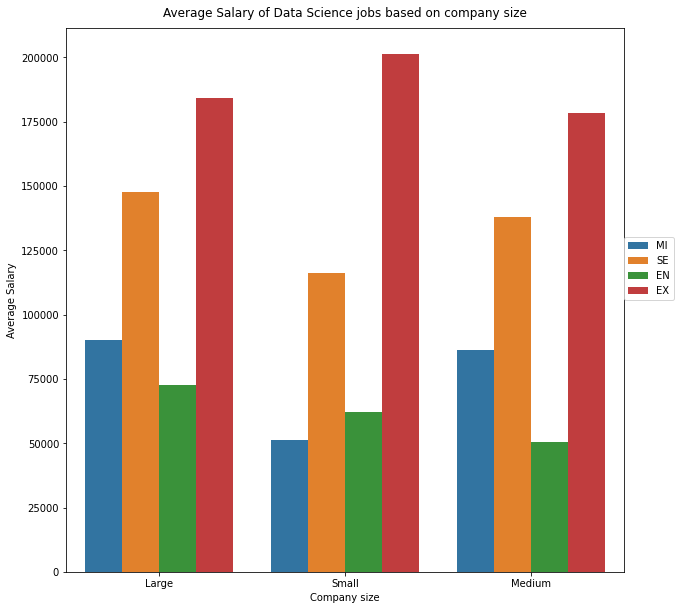

In [ ]:
# 4. 업무 숙련도,회사 규모에 따른 연봉 추이

plt.figure(figsize=(10, 10))
sns.barplot(x='company_size', y='salary', data=df, hue='experience_level', ci=0)
plt.legend(loc=(1, .5))
plt.xlabel('Company size')
plt.ylabel('Average Salary')
xticks = ['Large', 'Small','Medium']
plt.xticks(range(len(xticks)), xticks)
plt.title('Average Salary of Data Science jobs based on company size', y=1.01);

In [ ]:
# 데이터셋 분류

In [ ]:
# salary 칼럼 제거
df = df.drop(['salary'],axis=1)
df.head()

,experience_level,employment_type,job_title,remote_ratio,company_location,company_size,recommend
0,MI,FT,Data Scientist,0,DE,L,False
1,SE,FT,Machine Learning Scientist,0,JP,S,True
2,SE,FT,Big Data Engineer,50,GB,M,False
3,MI,FT,Product Data Analyst,0,HN,S,False
4,SE,FT,Machine Learning Engineer,50,US,L,False


In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.25, random_state=2)
val, test = train_test_split(val, test_size=0.5, random_state=2)
train.shape, val.shape, test.shape

((452, 7), (75, 7), (76, 7))

In [ ]:
target='recommend'
features = df.columns.drop('recommend')

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.4 MB/s 


In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


pipe = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


검증 정확도:  0.8666666666666667


In [ ]:
# 불균형 클래스 - class_weight 파라미터

In [ ]:
y_train.value_counts(normalize=True)

False    0.867257
True     0.132743
Name: recommend, dtype: float64

In [ ]:
custom = len(y_train)/(2*np.bincount(y_train))
custom

array([0.57653061, 3.76666667])

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, class_weight={False:custom[0],True:custom[1]}, random_state=2)
)


pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.7466666666666667


In [ ]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.75      0.83        64
        True       0.33      0.73      0.46        11

    accuracy                           0.75        75
   macro avg       0.64      0.74      0.65        75
weighted avg       0.85      0.75      0.78        75



In [ ]:
### 기준모델 - 타겟의 최빈값
# 분류 문제이므로 타겟의 최빈값을 기준모델로 두고 모델링을 할 계획입니다.
# 기준모델이란 예측 모델을 구체적으로 만들기 전에 가장 간단하면서도 직관적이면서 최소한의 성능을 나타내는 기준이 되는 모델을 기준모델 이라고 합니다
# 적어도 기준모델보다는 좋은 성능을 가진 모델을 만들어야 의미있는 분석과 머신러닝 모델이 만들어졌다는 뜻입니다.

In [ ]:
## 평가지표 - F1 SCORE

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import randint, uniform

In [ ]:
# 랜덤포레스트


pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)
dists = {
    'randomforestclassifier__max_depth': [5, 10, 15],
    'randomforestclassifier__n_estimators': randint(50, 500),
    'randomforestclassifier__min_samples_leaf': [1,5,10],
    'randomforestclassifier__criterion': ['gini', 'entropy']

}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3,
    verbose=1,
    n_jobs=-1,
    refit=True)

clf.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     oob_score=True,
                                                                     random_state=10))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                          

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,49,26,7,20,23,48,28,29,30,32,34,37,38,39,40,41,42,43,44,46,36,22,24,19,1,2,3,4,5,6,8,9,10,21,11,13,15,16,18,12,35,14,27,25,45,47,0,31,33,17
mean_fit_time,1.393978,0.325025,1.164765,1.207334,1.113348,0.852171,0.868756,1.441802,1.439938,0.348714,1.307148,0.263775,1.391038,0.751231,0.920392,1.380046,1.070699,0.319179,0.369457,0.31104,0.366012,1.372684,1.463308,1.039665,2.512742,1.162763,1.238406,1.145203,0.73449,0.875366,1.398484,1.026439,0.643399,1.044041,0.334136,0.888904,0.336645,0.189361,0.735991,1.434856,0.956214,0.803997,1.485255,0.525116,0.645923,1.058386,1.706776,1.126747,1.178783,1.337989
std_fit_time,0.127248,0.027208,0.040816,0.043655,0.06055,0.015013,0.022645,0.053223,0.022959,0.018625,0.03863,0.040243,0.044215,0.188335,0.075278,0.037273,0.015705,0.010872,0.026308,0.01385,0.004162,0.031934,0.033702,0.009601,0.308741,0.029838,0.029008,0.032063,0.096545,0.026352,0.041975,0.012973,0.015215,0.014712,0.009949,0.007338,0.020473,0.004925,0.03267,0.0681,0.032875,0.040706,0.03481,0.032208,0.03646,0.055421,0.243713,0.06592,0.04038,0.035816
mean_score_time,0.212955,0.112697,0.116134,0.116091,0.114412,0.116979,0.116811,0.21626,0.215958,0.112884,0.18328,0.116687,0.137393,0.135269,0.116354,0.217824,0.116831,0.116247,0.117242,0.11004,0.120185,0.217255,0.21792,0.115853,0.231757,0.117086,0.115849,0.148658,0.116977,0.115506,0.216317,0.117593,0.116241,0.115611,0.112002,0.113754,0.111502,0.119177,0.115404,0.215577,0.114366,0.114349,0.216069,0.11479,0.115512,0.117042,0.225133,0.117954,0.118799,0.217778
std_score_time,0.001823,0.002949,0.00039,0.000956,0.003202,0.001644,0.000329,0.000361,0.000505,0.002947,0.046102,0.004722,0.011193,0.027463,0.000341,0.001054,0.001579,0.000867,0.000893,0.000057,0.004881,0.002149,0.005347,0.000272,0.017452,0.002665,0.00062,0.048895,0.001869,0.003066,0.000581,0.003249,0.004602,0.00033,0.002488,0.002532,0.001009,0.004966,0.002901,0.003577,0.002762,0.002999,0.004043,0.003186,0.004001,0.002233,0.011683,0.0031,0.002721,0.004875
param_randomforestclassifier__criterion,entropy,gini,entropy,gini,gini,gini,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,gini,gini,gini,entropy,entropy,gini,gini,gini,gini,entropy,entropy,gini,entropy,gini,gini,gini,gini,gini,entropy,gini,entropy,gini,gini,entropy,gini,entropy,entropy,gini,entropy,entropy,entropy,entropy,gini,gini,gini
param_randomforestclassifier__max_depth,15,15,15,15,5,5,15,15,5,5,15,10,5,15,5,15,10,10,10,10,10,10,10,5,15,10,15,10,5,10,10,5,5,5,10,15,10,15,5,10,10,10,10,5,5,10,5,10,5,5
param_randomforestclassifier__min_samples_leaf,1,1,1,1,10,5,5,5,10,5,5,5,5,5,10,10,10,10,5,10,10,5,10,5,10,10,5,5,5,10,10,10,5,5,10,5,10,5,10,5,1,1,1,1,1,1,1,1,1,1
param_randomforestclassifier__n_estimators,481,68,348,370,372,275,274,466,466,100,425,58,292,149,299,447,341,73,110,72,107,448,493,329,422,380,398,364,234,278,473,340,198,335,75,279,91,56,222,481,297,242,499,159,180,342,488,353,386,456
params,{'randomforestclassifier__criterion': 'entropy...,"{'randomforestclassifier__criterion': 'gini', ...",{'randomforestclassifier__criterion': 'entropy...,"{'randomforestclassifier__criterion': 'gini', ...","{'randomforestclassifier__criterion': 'gini', ...","{'randomforestclassifier__criterion': 'gini', ...",{'randomforestclassifier__criterion': 'entropy...,{'randomforestclassifier__criterion': 'entropy...,{'randomforestclassifier__criterion': 'entropy...,{'randomforestclassifier__criterion': 'entropy...,{'randomforestclassifier__criterion': 'entropy...,{'randomforestclassifier__criterion': 'entropy...,{'randomforestclassifier__criterion': 'entropy...,{'randomforestclassifier__criterion': 'entropy...,{'randomforestclassifier__criterion': 'entropy...,"{'randomforestclassifier__criterion': 'gini', ...","{'randomforestclassifier__criterion': 'gini', ...","{'randomforestclassifier__criterion': 'gini', ...",{'randomforestclassifier__criterion': 'entropy...,{'randomforestclassifier__criterion': 'entropy...,"{'randomforestclassifier__criterion': 'gini', ...","{'randomfor

In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('accuracy score: ', clf.best_score_)

pipe = clf.best_estimator_

최적 하이퍼파라미터:  {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 481}
accuracy score:  0.8716703458425313


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

vc = y_train.value_counts().tolist() 
ratio = float(vc[0]/vc[1])

model = XGBClassifier(
    n_estimators=1000,  
    max_depth=7,        
    learning_rate=0.2,
    scale_pos_weight=ratio, # imbalance 데이터이므로 ratio를 계산하여 이 옵션을 설정하였습니다
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=50)

[0]	validation_0-error:0.225664	validation_1-error:0.253333
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.212389	validation_1-error:0.253333
[2]	validation_0-error:0.212389	validation_1-error:0.266667
[3]	validation_0-error:0.214602	validation_1-error:0.266667
[4]	validation_0-error:0.216814	validation_1-error:0.266667
[5]	validation_0-error:0.216814	validation_1-error:0.266667
[6]	validation_0-error:0.214602	validation_1-error:0.266667
[7]	validation_0-error:0.214602	validation_1-error:0.253333
[8]	validation_0-error:0.214602	validation_1-error:0.266667
[9]	validation_0-error:0.212389	validation_1-error:0.266667
[10]	validation_0-error:0.210177	validation_1-error:0.24
[11]	validation_0-error:0.207965	validation_1-error:0.24
[12]	validation_0-error:0.207965	validation_1-error:0.24
[13]	validation_0-error:0.20354	validation_1-error:0.213333
[14]	val

XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=1000, n_jobs=-1,
              scale_pos_weight=6.533333333333333)

In [ ]:
# RandomforestCV model 성능
y_pred_rf = pipe.predict(X_test)
print('훈련데이터 성능:',pipe.score(X_train,y_train))
print('검증데이터 성능:',pipe.score(X_val,y_val))
print('테스트데이터 성능:',pipe.score(X_test,y_test))
print('f1-score : ',f1_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

훈련데이터 성능: 0.922566371681416
검증데이터 성능: 0.8666666666666667
테스트데이터 성능: 0.868421052631579
f1-score :  0.375
              precision    recall  f1-score   support

       False       0.88      0.98      0.93        64
        True       0.75      0.25      0.38        12

    accuracy                           0.87        76
   macro avg       0.81      0.62      0.65        76
weighted avg       0.86      0.87      0.84        76



In [ ]:
# XGBoost model 성능

X_test_encoded = encoder.transform(X_test) # 테스트데이터

y_pred_xgb = model.predict(X_test_encoded)
print('훈련데이터 성능:',model.score(X_train_encoded,y_train))
print('검증데이터 성능:',model.score(X_val_encoded,y_val))
print('테스트데이터 성능:',model.score(X_test_encoded,y_test))
print('f1-score : ',f1_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

훈련데이터 성능: 0.8672566371681416
검증데이터 성능: 0.8533333333333334
테스트데이터 성능: 0.75
f1-score :  0.4242424242424242
              precision    recall  f1-score   support

       False       0.91      0.78      0.84        64
        True       0.33      0.58      0.42        12

    accuracy                           0.75        76
   macro avg       0.62      0.68      0.63        76
weighted avg       0.82      0.75      0.77        76



In [ ]:
# 모델들의 성능 비교
performance = {'Model':['RandomForest','XGBoost'],
               '검증 accuracy':[0.8666666666666667,0.8533333333333334],
               '테스트 accuracy':[0.868421052631579,0.75],
               'f1-score(조화평균)':[0.375,0.4242424242424242],
               'Precision(정밀도)':[0.75,0.33]}
df_performance = pd.DataFrame(data=performance).set_index('Model')
df_performance

,검증 accuracy,테스트 accuracy,f1-score(조화평균),Precision(정밀도)
Model,,,,
RandomForest,0.866667,0.868421,0.375000,0.75
XGBoost,0.853333,0.750000,0.424242,0.33


AUC score(RandomForestCV):  0.802734375
AUC score(XGBoost):  0.8502604166666666


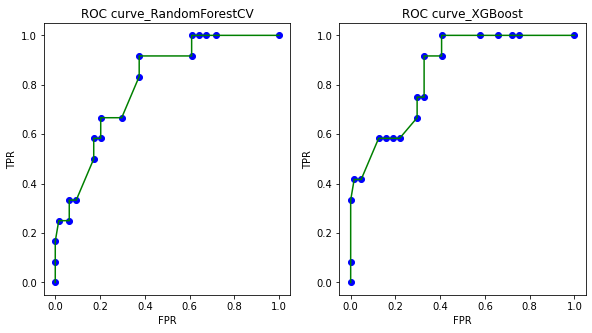

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

plt.figure(figsize=(15,5))

plt.subplot(132)
y_pred_proba = pipe.predict_proba(X_test)[:, -1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve_RandomForestCV')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('AUC score(RandomForestCV): ', roc_auc_score(y_test, y_pred_proba))

plt.subplot(133)
y_pred_proba = model.predict_proba(X_test_encoded)[:, -1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve_XGBoost')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('AUC score(XGBoost): ', roc_auc_score(y_test, y_pred_proba))

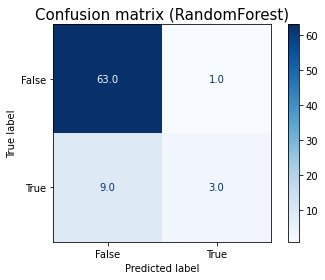

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax,
                            values_format='.1f',)
plt.title(f'Confusion matrix (RandomForest)', fontsize=15)
plt.show()

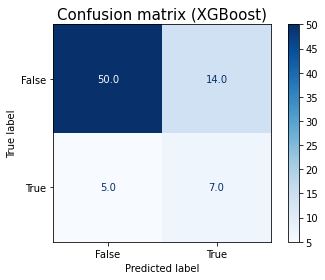

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model, X_test_encoded, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax,
                            values_format='.1f',)
plt.title(f'Confusion matrix (XGBoost)', fontsize=15)
plt.show()

In [ ]:
!pip install eli5
!pip install pandas-profiling==2.*
!pip install pdpbox
!pip install shap

In [ ]:
# permutation importance

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=2
)

permuter.fit(X_val_encoded, y_val);


In [ ]:
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.1147 ± 0.0765,experience_level
0.1120 ± 0.0644,job_title
0.0960 ± 0.0459,company_location
0.0667 ± 0.0773,company_size
0.0000 ± 0.0446,remote_ratio
0 ± 0.0000,employment_type


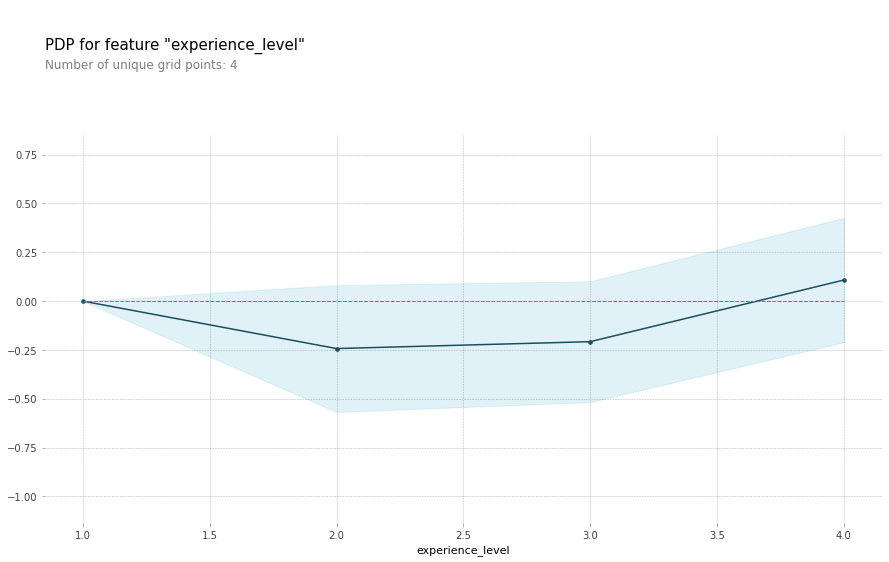

In [ ]:
# PDP

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'experience_level'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
# SHAP

row = X_test_encoded.iloc[[1]] 
row

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

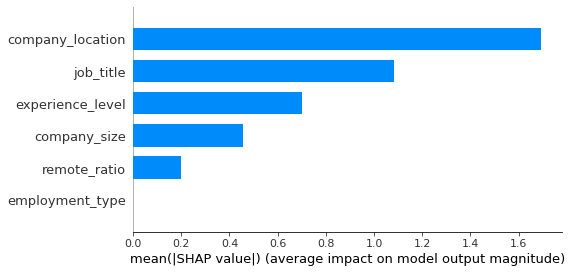

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")